In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as py
import seaborn as sn

In [4]:
df = pd.read_csv('C:\\Users\\User\\DataAnalysis\\data\\warehouse_retail_sales.csv')
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [ ]:
#describe the data
df.describe()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


(307645, 9)

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(307645, 9)

In [ ]:
#checking for missing values
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [ ]:
#dropping missing values
df.dropna(inplace=True)
df.isnull().sum()
df.shape

(307477, 9)

In [ ]:
#checking for unique values in each column
for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values')

YEAR has 4 unique values
MONTH has 12 unique values
SUPPLIER has 396 unique values
ITEM CODE has 34039 unique values
ITEM DESCRIPTION has 34805 unique values
ITEM TYPE has 8 unique values
RETAIL SALES has 10670 unique values
RETAIL TRANSFERS has 2504 unique values
WAREHOUSE SALES has 4855 unique values


In [ ]:
#replacing spaces with underscores
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df.head()

,YEAR,MONTH,SUPPLIER,ITEM_CODE,ITEM_DESCRIPTION,ITEM_TYPE,RETAIL_SALES,RETAIL_TRANSFERS,WAREHOUSE_SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [ ]:
#renaming columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['year', 'month', 'supplier', 'item_code', 'item_description',
       'item_type', 'retail_sales', 'retail_transfers', 'warehouse_sales'],
      dtype='object')

In [ ]:
#total sales
df["total_sales"] = df["retail_sales"] + df["warehouse_sales"]
df.head()
drop_columns = ["returns", "retail_returns", "retail_transfers"]
df.drop(columns=drop_columns, inplace=True)
df.head(20)

,year,month,supplier,item_code,item_description,item_type,retail_sales,warehouse_sales,total_sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,2.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,4.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,1.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,1.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.82
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,6.0,8.76
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.08
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,2.0,2.00
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,0.0,6.41
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,2.0,2.33


([<matplotlib.axis.XTick at 0x1c564c3a350>,
 [Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020')])

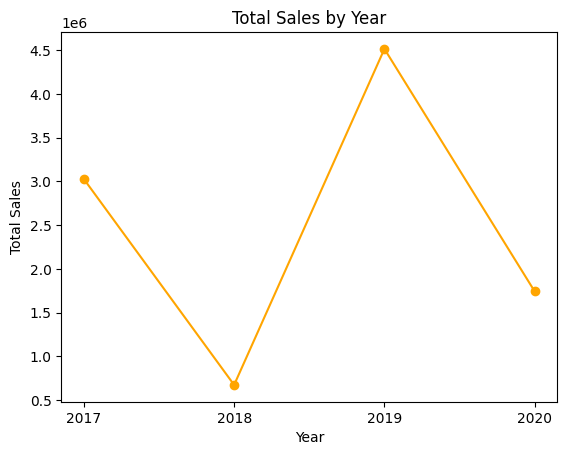

In [47]:
#what is the total sales for each year?
total_sales_by_year = df.groupby("year")["total_sales"].sum()
total_sales_by_year.plot(kind="line", marker="o", color="orange")
py.title("Total Sales by Year")
py.xlabel("Year") 
py.ylabel("Total Sales")
py.xticks(total_sales_by_year.index)



Text(0, 0.5, 'Total Sales')

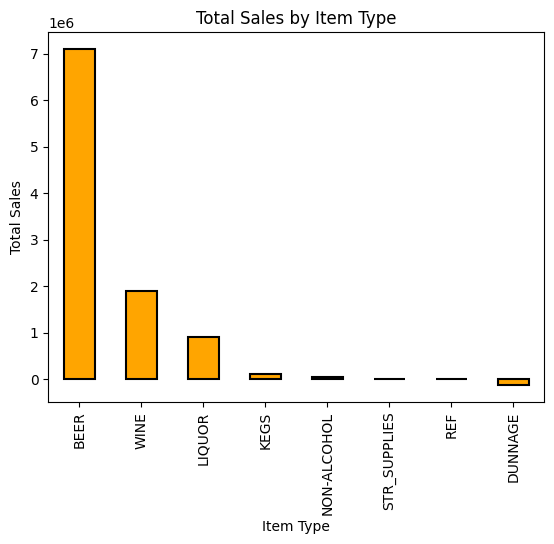

In [48]:
#What is the total sales for each product category?
total_sales_by_item = df.groupby("item_type")["total_sales"].sum().sort_values(ascending=False)
total_sales_by_item.plot(kind="bar", color="orange", edgecolor="black", linewidth=1.5)
py.title("Total Sales by Item Type")
py.xlabel("Item Type")
py.ylabel("Total Sales")

Text(0, 0.5, 'Total Sales')

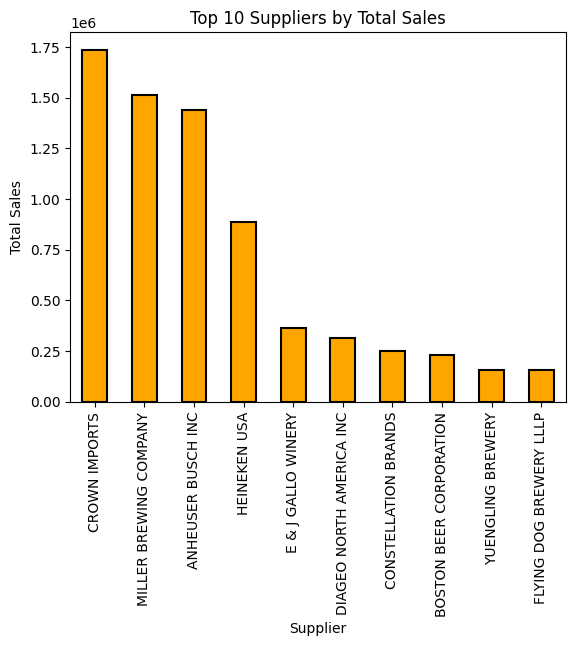

In [50]:
#what is the top 10 suppliers by total sales?
top_suppliers = df.groupby("supplier")["total_sales"].sum().sort_values(ascending=False).head(10)
top_suppliers.plot(kind="bar", color="orange", edgecolor="black", linewidth=1.5)
py.title("Top 10 Suppliers by Total Sales")
py.xlabel("Supplier")
py.ylabel("Total Sales")

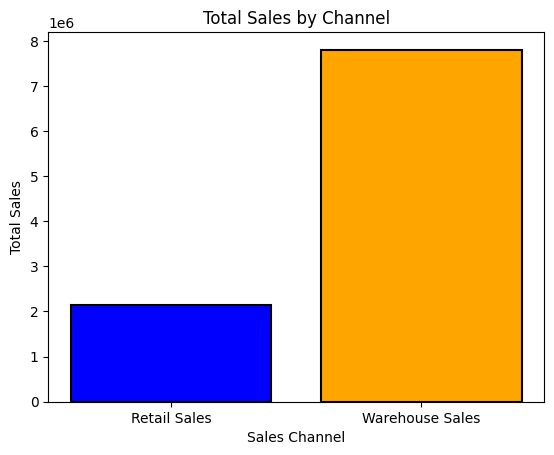

In [49]:
#retail sales vs warehouse sales
channel_sales = {
    "Retail Sales": df["retail_sales"].sum(),
    "Warehouse Sales": df["warehouse_sales"].sum()  
}

py.Figure(figsize=(8, 6))
py.bar(channel_sales.keys(), channel_sales.values(), color=["blue", "orange"], edgecolor="black", linewidth=1.5)
py.title("Total Sales by Channel")
py.xlabel("Sales Channel")
py.ylabel("Total Sales")
py.show()

